### L2 Regularization

- The idea is to penalize large weight by adding their squared magnitude to the cost function.
- J = plain squared error function + lambda * (magnitude of w)^2
- From probabilistic perspective, minimize the cost function is equivalent to find the MAP (maximum a posterior) problem.
- The solution of maximizing the posterior is to find the best setting of weights given data, P(w|data).
- it relates to the constant lambda (or l2 penalty) that we choose.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 50
X = np.linspace(0, 10, N)
Y = 0.5*X + np.random.randn(N)    # ... also plus some random noises

# manually set some outliers
Y[-1] += 30
Y[-2] += 30

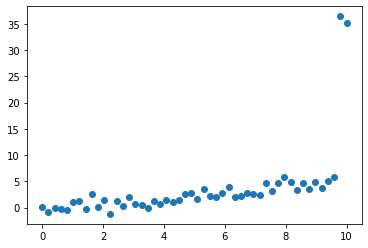

In [4]:
# plot the data to see what it looks like
plt.scatter(X, Y);

In [7]:
# solve for the best weights
# add the bias term, stack vertically, and transpose
X = np.vstack([np.ones(N), X]).T

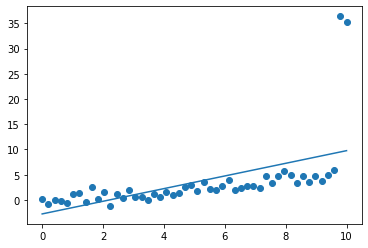

In [17]:
# first, calculate maximum likelihood solution
# overfitting to the outliers
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:, 1], Y, label='maximum likelihood')
plt.plot(X[:,1], Yhat);

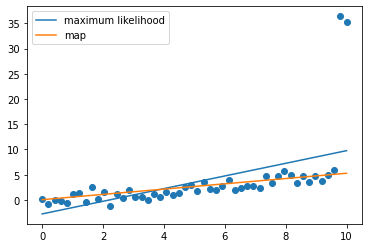

In [18]:
# do L2 regularization
# set l2 penalty (the constant lambda)
l2 = 1000.0
w_map = np.linalg.solve(X.T.dot(X) + l2*np.eye(2), X.T.dot(Y))
Yhat_map = X.dot(w_map)

# plot them all
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], Yhat_ml, label='maximum likelihood')
plt.plot(X[:,1], Yhat_map, label='map')
plt.legend();